# ECE M148 Homework 3

## Damien Ha

### Question 1

#### a.
$(\frac{n - 1}{n})^k$

#### b.
$\frac{1}{e}$

#### c. 
$(\frac{n - 1}{n})^{kr}$

### Question 2

#### a.
Given the lasso regularization of $\beta$ is $\lambda \sum_{i=1}^k \mid \beta_k \mid$

For $x_1$ we have $\sum_{i=1}^k \mid x_{1_i} \mid = \mid 4 \mid + \mid 5 \mid = 9$

For $x_2$ we have $\sum_{i=1}^k \mid x_{2_i} \mid = \mid -2 \mid + \mid 2 \mid = 4$

And their difference (the change in the lasso regularization) is 5

#### b.
Given the ridge reularization of $\beta$ is $\lambda \sum_{i=1}^k \beta_i^2$,

For $x_1$ we have $\sum_{i=1}^k x_{1_i}^2 = 4^2 + 5^2 = 41$

For $x_2$ we have $\sum_{i=1}^k x_{2_i}^2 = (-2)^2 + 2^2 = 8$

And their difference (the change in ridge regularization) is 33

#### c.
They are both techniques to prevent overfitting in regression models. The difference is that ridge adds a penalty to the square of the magnitude of the coefficients whereas lasso adds a penalty that is proportional to the absolute value of the magnitude of the coeeficients. For this reason, ridge may be more useful when all the features could be relevant while lasso is better for feature selection

### Question 3

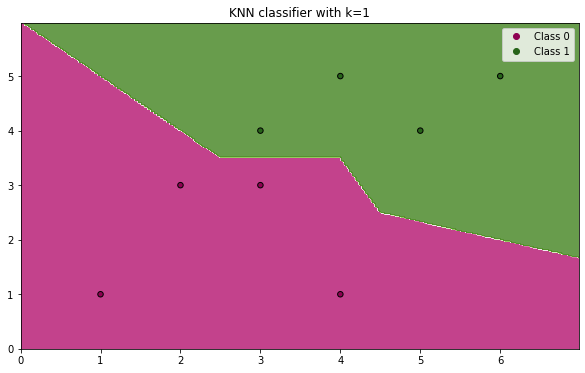

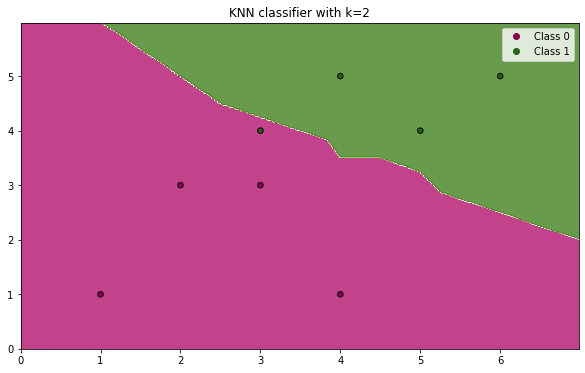

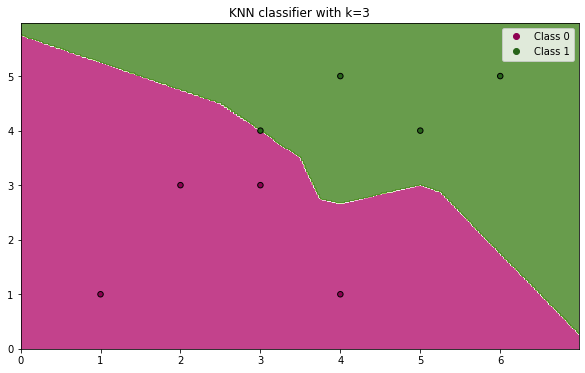

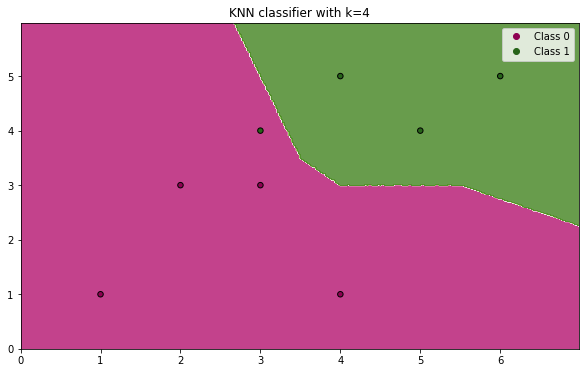

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

def draw_contour(x,y,clf, class_labels = ["Negative", "Positive"]):
    """
    Draws a contour line for the predictor
    
    Assumption that x has only two features. This functions only plots the first two columns of x.
    
    """
    
    X0, X1 = x[:, 0], x[:, 1]
    xx0, xx1 = make_meshgrid(X0,X1)
    
    plt.figure(figsize = (10,6))
    plot_contours(clf, xx0, xx1, cmap="PiYG", alpha=0.8)
    scatter=plt.scatter(X0, X1, c=y, cmap="PiYG", s=30, edgecolors="k")
    plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)

    plt.xlim(xx0.min(), xx0.max())
    plt.ylim(xx1.min(), xx1.max())

X = np.array([[1, 1], [4, 1], [2, 3], [3, 3], [3, 4], [5, 4], [6, 5], [4,5]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

k_values = [1, 2, 3, 4]

for k in k_values:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X, y)
    draw_contour(X, y, model, class_labels=["Class 0", "Class 1"])
    plt.title(f"KNN classifier with k={k}")
    plt.show()

I notice for lower k values like 1 or 2, the decision boundry seems to follow the points more precisely while for 3 and 4 the decision boundary is more general. This results in a "smoother" decision boundary for larger k, which somewhat shows the sensitivity of kNN. It's also interesting that for the k = 3 graph, there is a class 1 point right on the boundary at (3, 3). In k = 2 and k = 4 graphs, this point actually lies within the bounds of class 0 despite being in class 1. Perhaps this point lies at an area where the two classes are very similar, or that the features of the (3, 3) point are just difference from the points is near

### Question 4

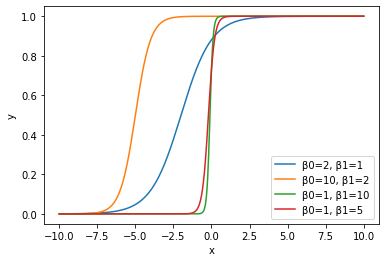

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x, b0, b1):
    return ((1)/(1 + np.exp(-(b0 + b1*x))))

x = np.linspace(-10, 10, 1000)

betas = [(2, 1), (10, 2), (1, 10), (1, 5)]

for b0, b1 in betas:
    y = logistic(x, b0, b1)
    plt.plot(x, y, label=f"β0={b0}, β1={b1}")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

For choice c, $\beta_0 = 1$ and $\beta_1 = 10$, the function is steepest, and is least steep for choice a, $\beta_0 = 2$ and $\beta_1 = 1$. It seems greater $\beta_1$ creates a steeper graph

### Question 5

#### a.
The purpose of using ridge regression over standard linear regression is to prevent overfitting and having a fairly general model. With standard linear regression we minimize the sum of the squared errors, and it may fit the data too closely if we have very correlated features. Ridge regression's penalty for sum of squared errors reduces this overfitting

#### b.
As $\lambda$ gets larger, the values of $\beta$ gets lower and lower, closer and closer to 0. Therefore we expect $\beta$ to converge to 0

#### c.
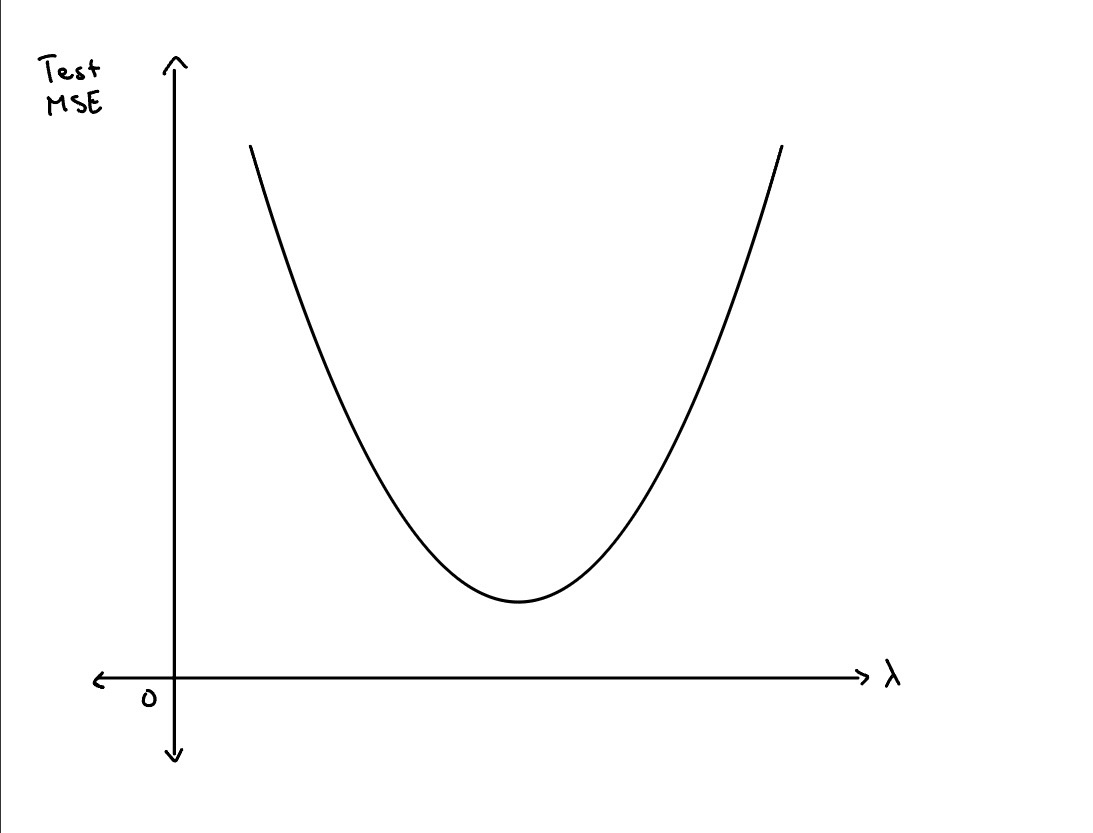

### Question 6

#### a.
False. The penalty in $L_2$ regularization, the coefficients are encouraged to be small, but they will not be 0

#### b.
False, we are iterating over each data point, excluding it, and training the model on the remaining N - 1 data points in this method

#### c.
False. A 95% confidence interval is a range of values we are 95% sure the true value of some parameter lies in

#### d.
False, we do not need to train J - K new models, we can simply test a single new model on our remaining variables. Also, though perhaps not mentioned in this class yet, there are both forward and backward stepwise variable selections, and even supposing we needed a new model for every single remaining varible, it wouldn;t necessarily be the case in general

#### e.
True. $P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$ and so if $P(A) = P(B)$ and isn't zero, $P(A \mid B) = P(B \mid A)$